In [32]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

original = pd.read_csv("Merged file.csv")
#Load the dataset
df = original[original["Training count"].notnull()]

In [23]:
#Print the first 5 rows of the dataframe.
df.head()

,Count,X,Y,Z,Training count,Output
0,4461,-3.92,-14.08,-9.16,49.0,0
21,4386,-2.98,-14.14,-9.71,48.0,0
36,4325,-2.73,-12.42,-11.27,47.0,0
54,4255,-2.90,-13.01,-10.09,46.0,0
71,4178,-3.45,-14.66,-8.19,45.0,0


In [24]:
# observe the shape of the dataframe.
df.shape

(104, 6)

#  create numpy arrays for features and target

In [67]:
X = df.drop(["Output","Training count","Count"],axis='columns')
y = df['Output']

In [68]:
y

0       0
21      0
36      0
54      0
71      0
       ..
1504    1
1517    1
1534    1
1547    1
1564    1
Name: Output, Length: 104, dtype: int64

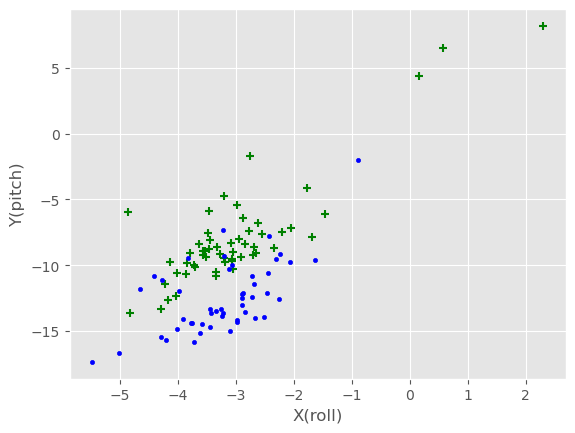

In [69]:
plt.xlabel('X(roll)')
plt.ylabel('Y(pitch)')

# Plotting where output is 1(apple grip) in green
plt.scatter(df[df['Output'] == 1]['X'], df[df['Output'] == 1]['Y'], color="green", marker='+', label='Output 1')

# Plotting where output is 0(bottle grip) in blue
plt.scatter(df[df['Output'] == 0]['X'], df[df['Output'] == 0]['Y'], color="blue", marker='.', label='Output 0')

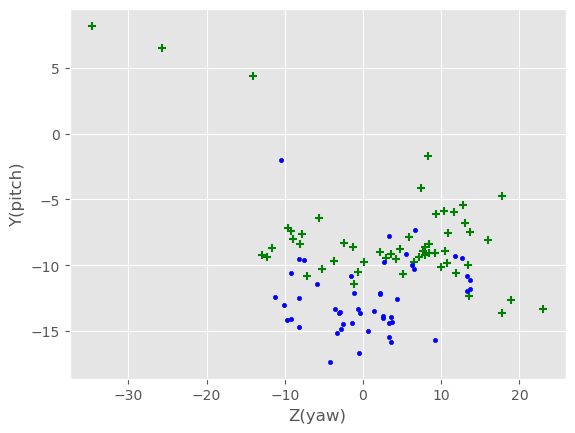

In [70]:
plt.xlabel('Z(yaw)')
plt.ylabel('Y(pitch)')

# Plotting where output is 1(apple grip) in green
plt.scatter(df[df['Output'] == 1]['Z'], df[df['Output'] == 1]['Y'], color="green", marker='+', label='Output 1')

# Plotting where output is 0(bottle grip) in blue
plt.scatter(df[df['Output'] == 0]['Z'], df[df['Output'] == 0]['Y'], color="blue", marker='.', label='Output 0')

In [71]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y, shuffle=True)

In [79]:
X_train.shape

(62, 3)

In [80]:
X_test.shape

(42, 3)

In [81]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
#setting up 
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    
      #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

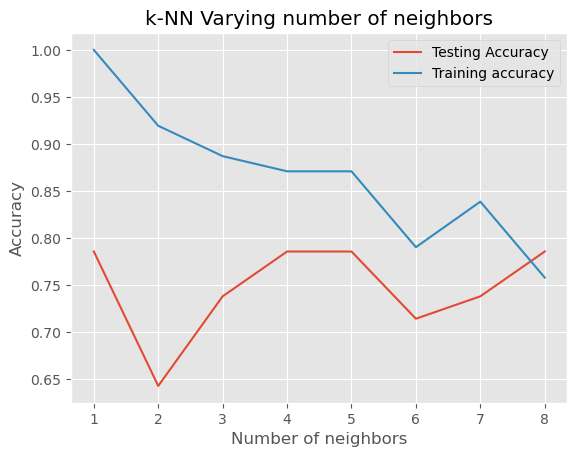

In [82]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [91]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=1)

In [92]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [86]:
from sklearn.metrics import classification_report
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77        20
           1       0.78      0.82      0.80        22

    accuracy                           0.79        42
   macro avg       0.79      0.78      0.78        42
weighted avg       0.79      0.79      0.79        42



In [87]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[15,  5],
       [ 4, 18]], dtype=int64)

In [95]:
knn.predict([[-2,-10,5]])

C:\Users\Ahan Bhatt\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)